# 🔄 使用 GitHub 模型的基本代理工作流程 (Python)

## 📋 工作流程編排教學

本筆記本介紹了 Microsoft Agent Framework 的強大功能——**工作流程構建器**。學習如何創建複雜的多步驟代理工作流程，能夠處理複雜的業務流程並無縫協調多個 AI 操作。

## 🎯 學習目標

### 🏗️ **工作流程架構**
- **工作流程構建器**：設計並編排複雜的多步驟流程
- **事件驅動執行**：處理工作流程事件和狀態轉換
- **可視化工作流程設計**：創建並可視化工作流程結構
- **GitHub 模型整合**：在工作流程上下文中利用 AI 模型

### 🔄 **流程編排**
- **順序操作**：以邏輯順序鏈接多個代理任務
- **條件邏輯**：實現決策點和分支工作流程
- **錯誤處理**：強大的錯誤恢復和工作流程韌性
- **狀態管理**：跟蹤並管理工作流程執行狀態

### 📊 **企業級工作流程模式**
- **業務流程自動化**：自動化複雜的組織工作流程
- **多代理協作**：協調多個專業代理
- **可擴展執行**：設計適用於企業規模的工作流程
- **監控與可觀測性**：跟蹤工作流程性能和結果

## ⚙️ 先決條件與設置

### 📦 **所需依賴項**

安裝具有工作流程功能的 Agent Framework：

```bash
pip install agent-framework-core -U
```

### 🔑 **GitHub 模型配置**

**環境設置 (.env 文件)：**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

### 🏢 **企業應用場景**

**業務流程範例：**
- **客戶入職**：多步驟驗證和設置工作流程
- **內容管道**：自動化內容創建、審核和發布
- **數據處理**：具有 AI 驅動轉換的 ETL 工作流程
- **質量保證**：自動化測試和驗證流程

**工作流程優勢：**
- 🎯 **可靠性**：具有錯誤恢復功能的確定性執行
- 📈 **可擴展性**：處理高容量的流程自動化
- 🔍 **可觀測性**：完整的審計記錄和監控
- 🔧 **可維護性**：可視化設計和模塊化組件

## 🎨 工作流程設計模式

### 基本工作流程結構
```mermaid
graph TD
    A[Start] --> B[Agent Task 1]
    B --> C{Decision Point}
    C -->|Success| D[Agent Task 2]
    C -->|Failure| E[Error Handler]
    D --> F[End]
    E --> F
```

**主要組件：**
- **WorkflowBuilder**：主要的編排引擎
- **WorkflowEvent**：事件處理與通信
- **WorkflowViz**：可視化工作流程表示和調試

現在就開始構建您的第一個智能工作流程吧！🚀


In [1]:
! pip install agent-framework-core -U

In [2]:
# 🔄 Import Workflow and Agent Framework Components
# Core components for building sophisticated agent workflows

from agent_framework.openai import OpenAIChatClient    # 🤖 GitHub Models client integration
from agent_framework import WorkflowBuilder, WorkflowEvent, WorkflowViz  # 🏗️ Workflow orchestration tools

In [3]:
# 📦 Import Environment and System Utilities
# Essential libraries for configuration and environment management

import os                      # 🔧 Environment variable access
from dotenv import load_dotenv # 📁 Secure configuration loading

In [4]:
# 🔧 Initialize Environment Configuration
# Load GitHub Models API credentials from .env file
load_dotenv()

True

In [5]:
# 🔗 Initialize GitHub Models Chat Client for Workflow Operations
# Create the AI client that will power agents within our workflow
chat_client = OpenAIChatClient(
    base_url=os.environ.get("GITHUB_ENDPOINT"),    # 🌐 GitHub Models API endpoint
    api_key=os.environ.get("GITHUB_TOKEN"),        # 🔑 Authentication token
    model_id=os.environ.get("GITHUB_MODEL_ID")  # 🎯 Selected AI model
)

In [6]:
REVIEWER_NAME = "Concierge"
REVIEWER_INSTRUCTIONS = """
    You are an are hotel concierge who has opinions about providing the most local and authentic experiences for travelers.
    The goal is to determine if the front desk travel agent has recommended the best non-touristy experience for a traveler.
    If so, state that it is approved.
    If not, provide insight on how to refine the recommendation without using a specific example. 
    """

In [7]:
FRONTDESK_NAME = "FrontDesk"
FRONTDESK_INSTRUCTIONS = """
    You are a Front Desk Travel Agent with ten years of experience and are known for brevity as you deal with many customers.
    The goal is to provide the best activities and locations for a traveler to visit.
    Only provide a single recommendation per response.
    You're laser focused on the goal at hand.
    Don't waste time with chit chat.
    Consider suggestions when refining an idea.
    """

In [8]:
reviewer_agent   = chat_client.create_agent(
        instructions=(
           REVIEWER_INSTRUCTIONS
        ),
        name=REVIEWER_NAME,
    )

front_desk_agent = chat_client.create_agent(
        instructions=(
            FRONTDESK_INSTRUCTIONS
        ),
        name=FRONTDESK_NAME,
    )

In [9]:
workflow = WorkflowBuilder().set_start_executor(front_desk_agent).add_edge(front_desk_agent, reviewer_agent).build()

In [10]:

print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  FrontDesk["FrontDesk (Start)"];
  Concierge["Concierge"];
  FrontDesk --> Concierge;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "FrontDesk" [fillcolor=lightgreen, label="FrontDesk\n(Start)"];
  "Concierge" [label="Concierge"];
  "FrontDesk" -> "Concierge";
}
SVG file saved to: C:\Users\kinfeylo\AppData\Local\Temp\tmpq947fo_v.svg


In [11]:
class DatabaseEvent(WorkflowEvent): ...

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmpq947fo_v.svg


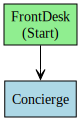

In [12]:
# Display the exported workflow SVG inline in the notebook

from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")


In [13]:
result =''
async for event in workflow.run_stream('I would like to go to Paris.'):
    if isinstance(event, DatabaseEvent):
        print(f"{event}")
    if isinstance(event, WorkflowEvent):
        result += str(event.data)
        # print(f"Workflow output: {event.data}")

In [14]:
result.replace("None", "")

'Visit the Louvre Museum for world-class art and historical masterpieces.While the Louvre is certainly an iconic destination, it can be quite touristy. To enhance the authenticity of your experience in Paris, consider recommending a lesser-known art space or gallery where you can appreciate local artists and their work. Additionally, exploring lesser-trodden neighborhoods or engaging with local artisans can provide a more genuine feel of Parisian culture. Aim for experiences that allow for personal interactions and deeper connections with the local community.While the Louvre is certainly an iconic destination, it can be quite touristy. To enhance the authenticity of your experience in Paris, consider recommending a lesser-known art space or gallery where you can appreciate local artists and their work. Additionally, exploring lesser-trodden neighborhoods or engaging with local artisans can provide a more genuine feel of Parisian culture. Aim for experiences that allow for personal inte


---

**免責聲明**：  
本文件已使用 AI 翻譯服務 [Co-op Translator](https://github.com/Azure/co-op-translator) 進行翻譯。雖然我們致力於提供準確的翻譯，但請注意，自動翻譯可能包含錯誤或不準確之處。原始文件的母語版本應被視為權威來源。對於關鍵資訊，建議使用專業人工翻譯。我們對因使用此翻譯而引起的任何誤解或錯誤解釋概不負責。
